$
    w = \frac{\overline{X} * \overline{Y} - \overline{(XY)}}{\overline{X}^2  - \overline{X^2}}
$

$
    b = \overline{Y} - w\overline{X}
$


线性回归函数参数: 斜率: 4.999999999999999 ,截距: 60.000000000000014


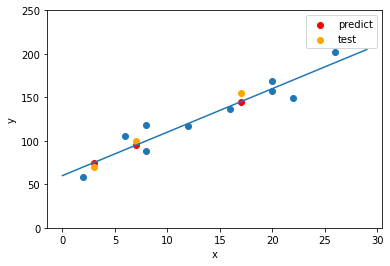

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

train_x = np.array([2, 6, 8, 8, 12, 16, 20, 20, 22, 26])
train_y = np.array([58, 105, 88, 118, 117, 137, 157, 169, 149, 202])

test_x = np.array([3, 7, 17]).reshape(-1, 1)
test_y = np.array([70, 100, 155]).reshape(-1, 1)


class OneLineaRegression:
    def __init__(self, train_x, train_y):
        self.train_x = train_x
        self.train_y = train_y
        self.train = np.hstack(
            (train_x.reshape(-1, 1), train_y.reshape(-1, 1)))
        self.w = 0
        self.b = 0

    def calcuate_loss(self):
        # x 均值
        x_avg = np.mean(self.train_x)
        # y 均值
        y_avg = np.mean(self.train_y)
        # x*y的均值
        xy_avg = np.mean(self.train_x * self.train_y)
        # 平方的均值
        xx_avg = np.mean(self.train_x ** 2)
        # 均值的平方
        x_avg_x = x_avg * x_avg

        self.w = (x_avg * y_avg - xy_avg) / (x_avg_x - xx_avg)
        self.b = y_avg - self.w * x_avg
        pass

    def predict(self, x):
        return self.w * x + self.b

    def show_line(self):
        line_x = np.arange(0, 30)
        line_y = self.w * line_x + self.b
        plt.scatter(self.train_x, self.train_y)
        plt.plot(line_x, line_y)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim(0, 250)
        test_pre_y = self.predict(test_x)
        plt.scatter(test_x, test_pre_y, c='r', label='predict')
        plt.scatter(test_x, test_y, c='orange', label='test')
        plt.legend()
        plt.show()
        pass


liner = OneLineaRegression(train_x, train_y)
liner.calcuate_loss()
print('线性回归函数参数:', '斜率:', liner.w, ',截距:', liner.b)
# 显示一个预测点  (16,16*w+b)
liner.show_line()


线性回归函数参数: 斜率: 5.0 ,截距: 60.0


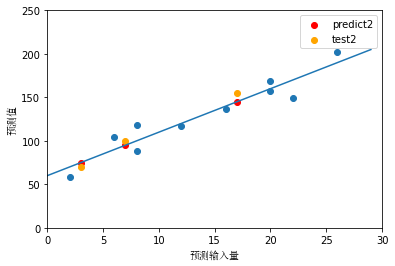

In [69]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

train_x = np.array([2, 6, 8, 8, 12, 16, 20, 20, 22, 26]).reshape((-1, 1))
train_y = np.array([58, 105, 88, 118, 117, 137, 157,
                   169, 149, 202]).reshape((-1, 1))

test_x = np.array([3, 7, 17]).reshape(-1, 1)
test_y = np.array([70, 100, 155]).reshape(-1, 1)

model = LinearRegression()
# train_x = shape(10,1)
model.fit(train_x, train_y)


def show_line(w, b):
    line_x = np.arange(0, 30)
    line_y = w * line_x + b
    plt.plot(line_x, line_y)
    plt.scatter(train_x, train_y)
    plt.xlabel('预测输入量', fontproperties="SimSun")
    plt.ylabel('预测值', fontproperties="SimSun")
    plt.ylim(0, 250)
    plt.xlim(0, 30)
    test_pre_y = model.predict(test_x)
    plt.scatter(test_x, test_pre_y, c='r', label='predict2')
    plt.scatter(test_x, test_y, c='orange', label='test2')
    plt.legend()
    plt.show()


print('线性回归函数参数:', '斜率:', model.coef_[0, 0], ',截距:', model.intercept_[0])
show_line(model.coef_[0, 0], model.intercept_[0])


- 一元线性回归-->多项式回归 （扩展，优化）
  ```
    多项式回归是再一元线性回归的基础上，添加了高阶项，使得回归更加复杂，来调优的过程。
  ```
  - 模型选择变化
    $
      y = w*x + b
    $
    变为
    $
      y=b+\beta_1 * x+ \beta_2 * x^2+ \beta_3 * x^3+ \beta_4 * x^4+ \beta_5 * x^5
    $
- 二次回归（讲解）
    $
    y = b + \beta_1 * x + \beta_2 * x^2
    $


线性回归函数参数: 斜率: 0.9762931034482755 ,截距: 1.965517241379315
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]


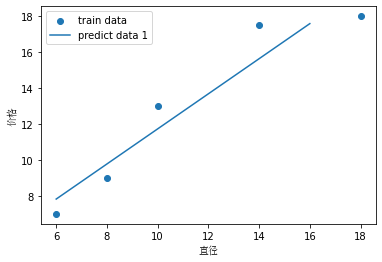

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

train_x = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
train_y = np.array([7, 9, 13, 17.5, 18]).reshape(-1, 1)
test_x = np.array([6, 8, 11, 16]).reshape(-1, 1)
test_y = np.array([8, 12, 15, 18]).reshape(-1, 1)

model1 = LinearRegression()
model1.fit(train_x, train_y)
print('线性回归函数参数:', '斜率:', model1.coef_[0, 0], ',截距:', model1.intercept_[0])
# 一维线性预测
test_pre_y = model1.predict(test_x)

quad_model = PolynomialFeatures(degree=2)
# 生成多项式数据 A**0 ,A ** 1 , A**2,...
train_x_quad = quad_model.fit_transform(train_x)
test_x_quad = quad_model.fit_transform(test_x)
model2 = LinearRegression()
model2.fit(train_x_quad, train_y)
print(train_x_quad)
# print('线性回归函数参数:', '斜率:', model1.coef_,',截距:', model1.intercept_[0])

# 显示训练数据
plt.scatter(train_x, train_y,label='train data')
# 显示一维预测模型
plt.plot(test_x, test_pre_y,label='predict data 1')
plt.xlabel('直径',fontproperties="SimSun")
plt.ylabel('价格',fontproperties="SimSun")
plt.legend()
plt.show()
